In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [5]:
df.shape

(2003, 6)

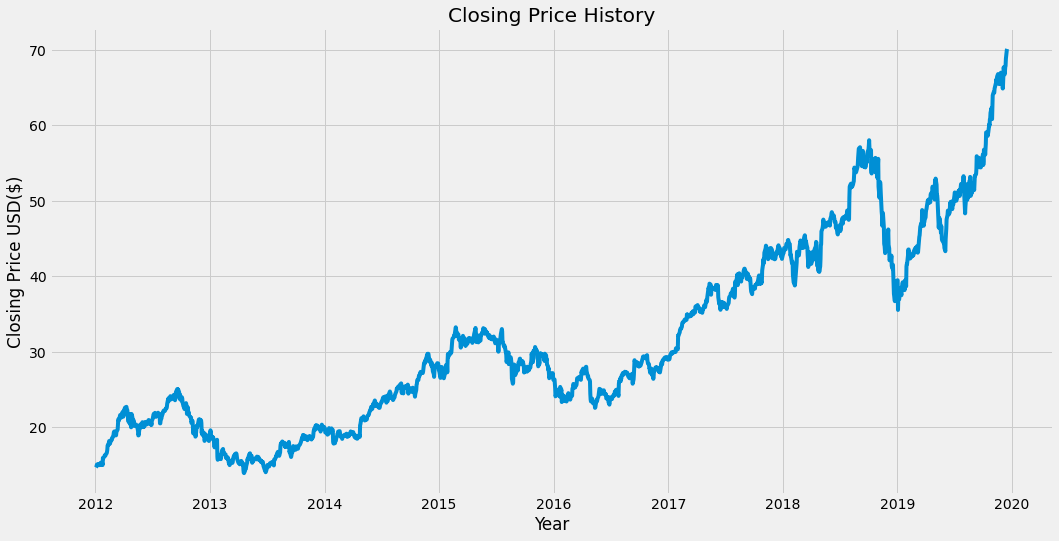

In [6]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Year')
plt.ylabel('Closing Price USD($)')
plt.show()

In [7]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)

In [9]:
train_data = scaler_data[0:training_data_len]
x_train, y_train = [],[]
for i in range(60,training_data_len):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 40s 24ms/step - loss: 3.3737e-04


In [30]:
test_data = scaler_data[training_data_len - 60: ,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [31]:
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0],x_test.shape[1],1))

In [32]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [33]:
rmse = np.sqrt(np.mean( predictions-y_test )**2 )
rmse

0.6639185714721679

In [34]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


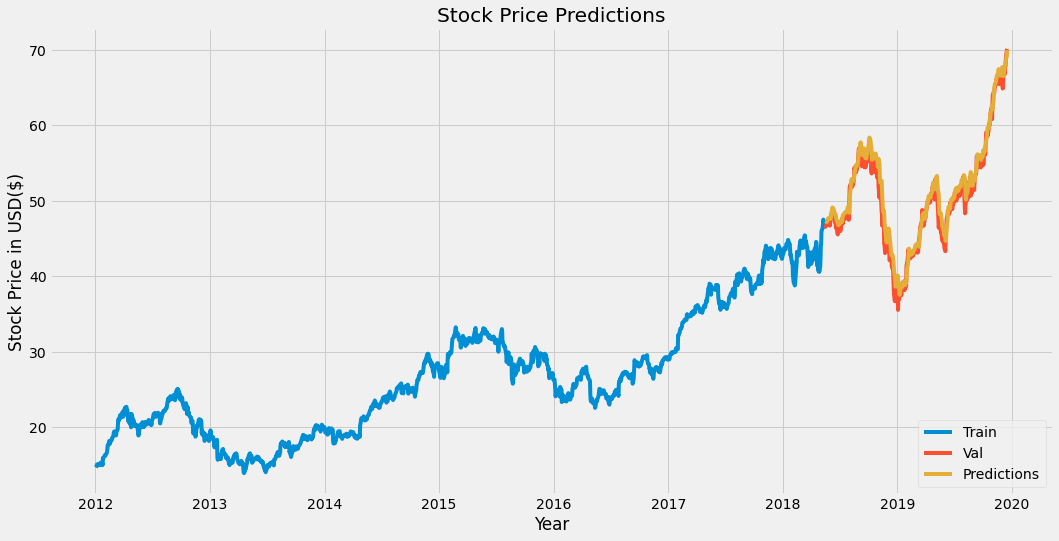

In [35]:
plt.figure(figsize=(16,8))
plt.title('Stock Price Predictions')
plt.xlabel('Year')
plt.ylabel('Stock Price in USD($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')

In [27]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,51.854225
2018-05-18,46.577499,51.853230
2018-05-21,46.907501,51.782265
2018-05-22,46.790001,51.737652
2018-05-23,47.090000,51.693966
...,...,...
2019-12-11,67.692497,74.042145
2019-12-12,67.864998,74.337440
2019-12-13,68.787498,74.646103
